In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv("LifeExpectancy.csv")


df.shape


(2928, 22)

In [98]:
# Drop every na
df = df.dropna()

df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [99]:
# New dataframe with selected columns

df = df[["Status",
        'Life expectancy',
        'Adult Mortality',
        'infant deaths',
        'Alcohol',
        'percentage expenditure',
        'Hepatitis B',
        'Measles ',
        ' BMI ',
        'under-five deaths ',
        'Polio',
        'Total expenditure',
        'Diphtheria ',
        ' HIV/AIDS',
        'GDP',
        'Population',
        ' thinness  1-19 years',
        ' thinness 5-9 years',
        'Income composition of resources',
        'Schooling']]

df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Developing,44.3,723,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Developing,44.5,715,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Developing,44.8,73,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Developing,45.3,686,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [100]:
# Transform "Status" to values

df["Status"] = df["Status"].astype("category")
df["Status"] = df["Status"].cat.codes

<Axes: title={'center': 'Correlation'}>

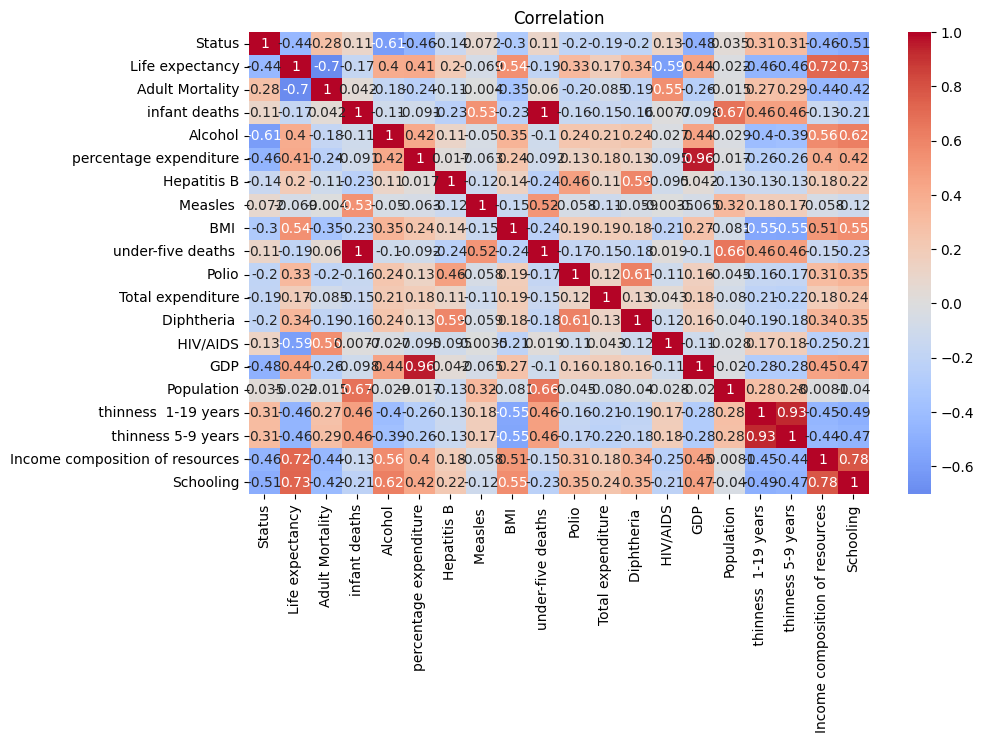

In [101]:
correlation = df.corr()

plt.figure(figsize=(10,6))
plt.title("Correlation")
sns.heatmap(correlation,
            annot=True,
            cmap="coolwarm",
            center=0)

<Axes: xlabel='Income composition of resources', ylabel='Life expectancy'>

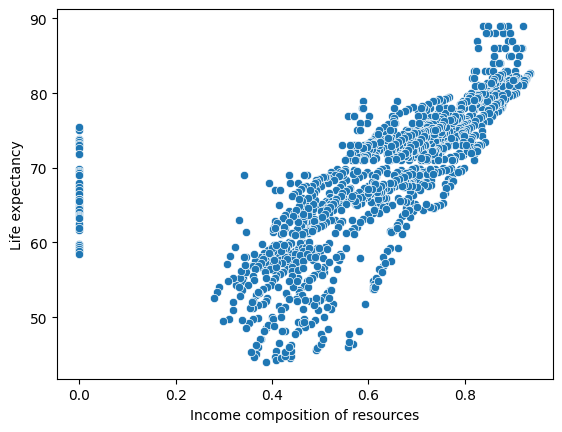

In [102]:
# X and y variables
X = df["Income composition of resources"]
y = df["Life expectancy"]

sns.scatterplot(x=X,
                y=y)

In [103]:
# Transform X and y to one column dataframe
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Create model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [104]:
# Calculate intercept - y when X is 0, y and R2
intercept = lr.intercept_
coeficient = lr.coef_
r2 = lr.score(X, y)

print("Intercept: ", intercept)
print("Coeficient: ", coeficient)
print("R2: ", r2)

# The model is weak, 51% of the cases can be explained by the independt variable

Intercept:  [47.4217458]
Coeficient:  [[34.64573757]]
R2:  0.5199601058083201


In [105]:
# Calculate regression line
y_prediction = lr.predict(X)

y_prediction

array([[64.01705409],
       [63.91311688],
       [63.70524245],
       ...,
       [62.21547574],
       [62.21547574],
       [62.4579959 ]])

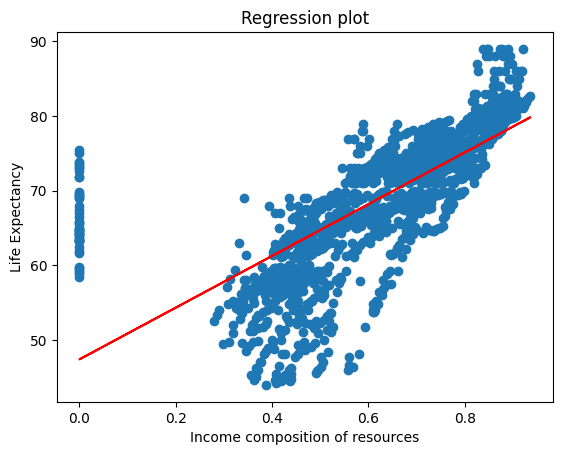

In [106]:
# Best fit line
plt.title("Regression plot")
plt.xlabel("Income composition of resources")
plt.ylabel("Life Expectancy")
plt.scatter(X, y)
plt.plot(X, y_prediction, color="red")